In [1]:
import numpy as np
import Otimin as OM
import matplotlib.pyplot as plt
#from matplotlib import use
#use("Qt5Agg")
from scipy.stats import norm

def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def plot_ecdf(a):
    x, y = ecdf(a)
    x = np.insert(x, 0, x[0])
    y = np.insert(y, 0, 0.)
    plt.plot(x, y, drawstyle='steps-post')
    plt.grid(True)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

findfont: Font family ['Arial Narrow'] not found. Falling back to DejaVu Sans.



14792
14793
14794
14795
14796
14797
14798
14799
14800
14801
14802
14803
14804
14805
14806
14807
14808
14809
14810
14811
14812
14813
14814
14815
14816
14817
14818
14819
14820
14821
14822
14823
14824
14825
14826
14827
14828
14829
14830
14831
14832
14833
14834
14835
14836
14837
14838
14839
14840
14841
14842
14843
14844
14845
14846
14847
14848
14849
14850
14851
14852
14853
14854
14855
14856
14857
14858
14859
14860
14861
14862
14863
14864
14865
14866
14867
14868
14869
14870
14871
14872
14873
14874
14875
14876
14877
14878
14879
14880
14881
14882
14883
14884
14885
14886
14887
14888
14889
14890
14891
14892
14893
14894
14895
14896
14897
14898
14899
14900
14901
14902
14903
14904
14905
14906
14907
14908
14909
14910
14911
14912
14913
14914
14915
14916
14917
14918
14919
14920
14921
14922
14923
14924
14925
14926
14927
14928
14929
14930
14931
14932
14933
14934
14935
14936
14937
14938
14939
14940
14941
14942
14943
14944
14945
14946
14947
14948
14949
14950
14951
14952
14953
14954
14955
14956
14957
149

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


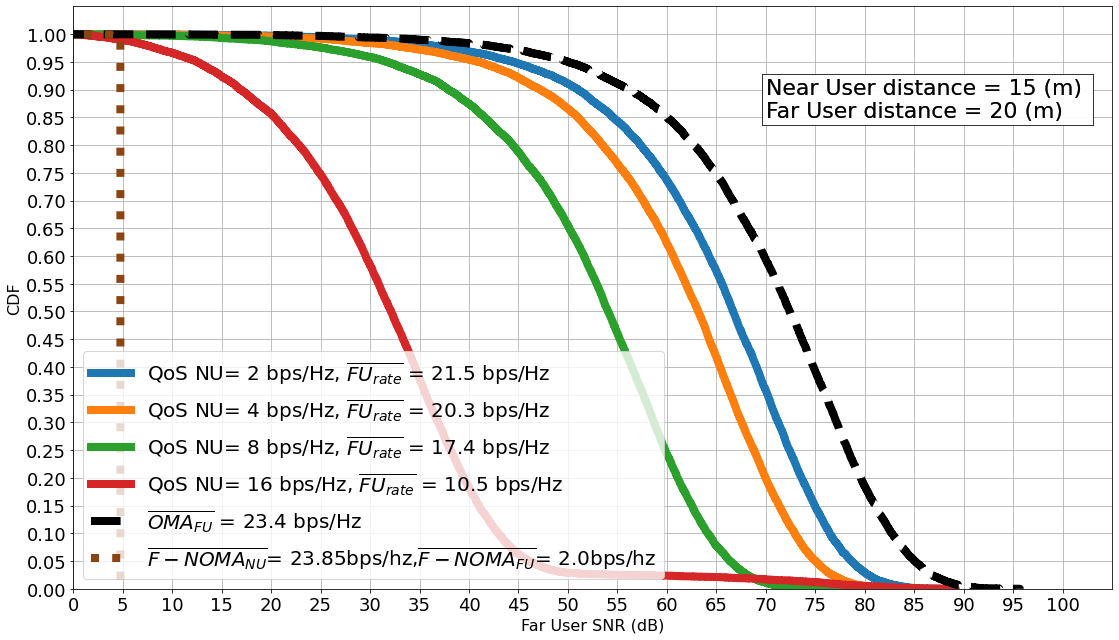

In [2]:
N=15000


t=6000
d1 = [15]
d2 = [20]
for i in range(len(d1)):
    d_nu = d1[i]
    
    d_fu = d2[i]
    CG_NU = (OM.Canal(d_nu,2,N))
    CG_FU = (OM.Canal(d_fu,2,N))
    plt.figure(figsize=(16,9))
    for index in range(1,5):
        qos = 2**(index)
        R1 = list()
        R2 = list()
        SNR1 = list()
        SNR2 = list()
        OMA2 = list()
        SNROMA2= list()
        OMA1 = list()
        SNROMA1= list()
        Outage = list()
        alpha = list()
        FR1 = list()
        FR2 = list()
        FSNR1 = list()
        FSNR2 = list()
        m =0
        for i in range(len(CG_NU)):
            #print(OM.pow2db(CG_NU[i]))
            #print(OM.pow2db(CG_FU[i]))
            print(m)
            m+=1
            Inst = OM.Otimizar_NOMA(CG_NU[i],CG_FU[i],OM.db2pow(-174)/1000,OM.db2pow(44)/1000,1,qos,1)
            
            OMA2.append(Inst['R_OMA_FU'])
            OMA1.append(Inst['R_OMA_NU'])
                
            FR1.append((Inst['R_FNOMA_NU']))
            FR2.append(((Inst['R_FNOMA_FU'])))
            FSNR1.append(Inst['SNR_FNOMA_NU'])
            FSNR2.append(Inst['SNR_FNOMA_FU'])
            SNROMA2.append(Inst['SNR_OMA_FU'])
            SNROMA1.append(Inst['SNR_OMA_NU'])
            alpha.append(Inst['alpha'])
            R1.append((Inst['R_NU']))
            R2.append(((Inst['R_FU'])))  
            SNR1.append(Inst['SNR_NU'])
            SNR2.append(Inst['SNR_FU'])    
                                                                            
                    
                #if Inst[2] == 0:
                #   print(Inst[1])
                #  print(Inst[2])
                # print(Inst[4])
                    #print(Inst[5])
            #plt.hist(R2,bins=1000,cumulative=-1,density=True,histtype='step',label=f'QoS = {qos}bps, d_fu = {d_fu}, d_nu = {d_nu}')

        #X = R2
        #mean = np.mean(R2,axis=0)
        #X-=mean
        #std = np.std(R2,axis=0)
        #X/=std
        #count, bins_count = np.histogram(R2, bins= 10000)
        #pdf = count / sum(count)
        #cdf = np.cumsum(pdf)
        snfu = r'$\overline{FU_{rate}}$'
        snfu_OMA = r'$\overline{OMA SNR_{FU}}$'
        snnu = r'$\overline{SNR_{NU}}$'
        Alpha = r'$\overline{\alpha}$'
        x, counts = np.unique(OM.pow2db(SNR2), return_counts=True)
        cusum = np.cumsum(counts)
        y = cusum / cusum[-1]
        x = np.insert(x, 0, x[0])
        y = np.insert(y, 0, 0.)
        y_cdf = norm.cdf(R2)
        plt.plot(x, 1-y, drawstyle='steps-post',label=f'QoS NU= {qos} bps/Hz, {snfu} = {round(np.mean(R2),1)} bps/Hz',linewidth=8)
        #plt.plot(bins_count[1:], 1-cdf,label=f'QoS NU= {qos}bps/hz, {snnu} = {round(OM.pow2db(np.mean(SNR1)),2)} (dB), {snfu} = {round(OM.pow2db(np.mean(SNR2)),2)}(dB)',linewidth=3.0)            
        plt.legend(loc=4, prop={'family':'Arial Narrow', 'size':22})            
        plt.ylim(ymin=0)
        plt.xlim(xmin=0,xmax=105)
        plt.yticks(np.arange(0,1.05,0.05),fontsize=18)
        plt.xticks(np.arange(0,105,5),fontsize=18)
        nl = '\n'
        plt.text(70,0.85,f'Near User distance = {d_nu} (m) {nl}Far User distance = {d_fu} (m)',bbox=dict(facecolor='white', alpha=0.5),fontsize=22)

        


    plt.xlabel('Far User SNR (dB)',fontsize=16)
    #plt.title(f'Outage Probability',fontsize=20)
    plt.grid(True)
    plt.ylabel('CDF',fontsize=16)
    #count, bins_count = np.histogram(OMA, bins= 10000)
    #pdf = count / sum(count)
    #cdf = np.cumsum(pdf)
    snnu = r'$\overline{OMA_{FU}}$'
    x, counts = np.unique(OM.pow2db(SNROMA2), return_counts=True)
    cusum = np.cumsum(counts)
    y = cusum / cusum[-1]
    x = np.insert(x, 0, x[0])
    y = np.insert(y, 0, 0.)
    y_cdf = norm.cdf(OMA2)
    plt.plot(x, 1-y, '--',color='black',drawstyle='steps-post', label=f'{snnu} = {round(np.mean(OMA2),1)} bps/Hz',linewidth=8)#,label=f'Far User OMA {snnu} = {round(OM.pow2db(np.mean(SNROMA2)),2)}(dB)',linewidth=3.0)
    #plt.plot(bins_count[1:], 1-cdf,label=f'Far User OMA {snnu} = {round(OM.pow2db(np.mean(SNROMA)),2)}(dB)',linewidth=3.0)  
    # 


    '''snnu = r'$\overline{SNR_{NU}}$'
    x, counts = np.unique(OMA1, return_counts=True)
    cusum = np.cumsum(counts)
    y = cusum / cusum[-1]
    x = np.insert(x, 0, x[0])
    y = np.insert(y, 0, 0.)
    y_cdf = norm.cdf(OMA1)
    plt.plot(x, y, drawstyle='steps-post',label=f'Near User OMA {snnu} = {round(OM.pow2db(np.mean(SNROMA1)),2)}(dB)',linewidth=3.0) ''' 


    '''snfu = r'$\overline{Fix_SNR_{FU}}$'
    snnu = r'$\overline{Fix_SNR_{NU}}$'
    x, counts = np.unique(FR2, return_counts=True)
    cusum = np.cumsum(counts)
    y = cusum / cusum[-1]
    x = np.insert(x, 0, x[0])
    y = np.insert(y, 0, 0.)
    y_cdf = norm.cdf(FR2)
    plt.plot(x, y, drawstyle='steps-post',label=f'NU rate = {round((np.mean(FR1)),2)}bps/hz')#, {snnu} = {round(OM.pow2db(np.mean(FSNR1)),2)} (dB), {snfu} = {round(OM.pow2db(np.mean(FSNR2)),2)}(dB)',linewidth=3.0,)'''



    snfu = r'$\overline{Fix SNR_{FU}}$'
    snnu = r'$\overline{Fix SNR_{NU}}$'
    snnuOMA = r'$\overline{F-NOMA_{NU}}$'
    snfuOMA = r'$\overline{F-NOMA_{FU}}$'
    x, counts = np.unique(OM.pow2db(FSNR2), return_counts=True)
    cusum = np.cumsum(counts)
    y = cusum / cusum[-1]
    x = np.insert(x, 0, x[0])
    y = np.insert(y, 0, 0.)
    y_cdf = norm.cdf(FR2)
    plt.plot(x, 1-y,':' ,color='saddlebrown',drawstyle='steps-post',label=f'{snnuOMA}= {round((np.mean(FR1)),2)}bps/hz,{snfuOMA}= {round((np.mean(FR2)),1)}bps/hz',linewidth=8)
    plt.tight_layout()
    plt.legend(loc=0, prop={'family':'Arial', 'size':20})
    plt.savefig(f'{d_nu}_{d_fu}.pdf',bbox_inches='tight')
    t+=1
    #print(t)
    



In [3]:
np.random.get_state()[1][0]

192709087

In [4]:
N=10000
t=13
for i in range(5,6):
    d_nu = 45
    for j in range(1,2):
        d_fu =90
        CG_NU = (OM.Canal(d_nu,2,N))
        CG_FU = (OM.Canal(d_fu,2,N))
        plt.figure(figsize=(16,9))
        for index in range(1,5):
            qos = 2**(index)
            R1 = list()
            R2 = list()
            SNR1 = list()
            SNR2 = list()
            OMA2 = list()
            SNROMA2= list()
            OMA1 = list()
            SNROMA1= list()
            Outage = list()
            alpha = list()
            for i in range(len(CG_NU)):
                #print(OM.pow2db(CG_NU[i]))
                #print(OM.pow2db(CG_FU[i]))
                Inst = OM.Otimizar_NOMA(CG_NU[i],CG_FU[i],OM.db2pow(-174)/1000,OM.db2pow(44)/1000,1,qos,1)
                if Inst[1] or Inst[2] == 0:
                    Outage.append(1)
                else:
                    Outage.append(0)
                R1.append((Inst[1]))
                R2.append(((Inst[2])))
                alpha.append(Inst[3])
                SNR1.append(Inst[4])
                SNR2.append(Inst[5])
                OMA2.append(Inst[7])
                SNROMA2.append(Inst[8])
                OMA1.append(Inst[9])
                SNROMA1.append(Inst[10])

                    #if Inst[2] == 0:
                    #   print(Inst[1])
                    #  print(Inst[2])
                    # print(Inst[4])
                        #print(Inst[5])
                #plt.hist(R2,bins=1000,cumulative=-1,density=True,histtype='step',label=f'QoS = {qos}bps, d_fu = {d_fu}, d_nu = {d_nu}')

            #X = R2
            #mean = np.mean(R2,axis=0)
            #X-=mean
            #std = np.std(R2,axis=0)
            #X/=std
            #count, bins_count = np.histogram(R2, bins= 10000)
            #pdf = count / sum(count)
            #cdf = np.cumsum(pdf)
            snfu = r'$\overline{SNR_{FU}}$'
            snnu = r'$\overline{SNR_{NU}}$'
            x, counts = np.unique(1-np.array(alpha), return_counts=True)
            cusum = np.cumsum(counts)
            y = cusum / cusum[-1]
            x = np.insert(x, 0, x[0])
            y = np.insert(y, 0, 0.)

            y_cdf = norm.cdf(alpha)
            plt.plot(x, y, drawstyle='steps-post',label=f'QoS NU= {qos}bps/hz, {snnu} = {round(OM.pow2db(np.mean(SNR1)),2)} (dB), {snfu} = {round(OM.pow2db(np.mean(SNR2)),2)}(dB), Alpha = {np.mean(alpha)}',linewidth=6)
            #plt.plot(bins_count[1:], 1-cdf,label=f'QoS NU= {qos}bps/hz, {snnu} = {round(OM.pow2db(np.mean(SNR1)),2)} (dB), {snfu} = {round(OM.pow2db(np.mean(SNR2)),2)}(dB)',linewidth=3.0)
            plt.legend(fontsize=13, title_fontsize=15)
            
            plt.ylim(ymin=0)
            plt.xlim(xmin=0)
            #plt.xticks([0,2,4,8,16,32])
            plt.yticks(np.arange(0,1.05,0.05))
            nl = '\n'
            plt.text(1,0.5,f'Near User distance = {d_nu} (m) {nl}Far User distance = {d_fu} (m)',bbox=dict(facecolor='white', alpha=0.5),fontsize=13)

            


            plt.xlabel('Far User Spectral Efficiency (bps/hz)',fontsize=13)
            plt.title(f'Outage Probability',fontsize=20)
            plt.grid(True)
            plt.ylabel('CDF',fontsize=13)
        #count, bins_count = np.histogram(OMA, bins= 10000)
        #pdf = count / sum(count)
        #cdf = np.cumsum(pdf)
        #snnu = r'$\overline{SNR_{FU}}$'
        #x, counts = np.unique(OMA2, return_counts=True)
        #cusum = np.cumsum(counts)
        #y = cusum / cusum[-1]
        #x = np.insert(x, 0, x[0])
        #y = np.insert(y, 0, 0.)
        #y_cdf = norm.cdf(OMA2)
        #plt.plot(x, y, drawstyle='steps-post',label=f'Far User OMA {snnu} = {round(OM.pow2db(np.mean(SNROMA2)),2)}(dB)',linewidth=3.0)
        #plt.plot(bins_count[1:], 1-cdf,label=f'Far User OMA {snnu} = {round(OM.pow2db(np.mean(SNROMA)),2)}(dB)',linewidth=3.0)  
        # 
        #snnu = r'$\overline{SNR_{NU}}$'
        #x, counts = np.unique(OMA1, return_counts=True)
        #cusum = np.cumsum(counts)
        #y = cusum / cusum[-1]
        #x = np.insert(x, 0, x[0])
        #y = np.insert(y, 0, 0.)
        #y_cdf = norm.cdf(OMA1)
        #plt.plot(x, y, drawstyle='steps-post',label=f'Near User OMA {snnu} = {round(OM.pow2db(np.mean(SNROMA1)),2)}(dB)',linewidth=3.0)  
        plt.legend(fontsize=12, title_fontsize=15)
        #plt.savefig(f'Outa{t}.pdf',bbox_inches='tight')
        t+=1
    

KeyError: 1

<Figure size 1152x648 with 0 Axes>

In [ ]:
N=20000
t=0
for i in range(5,6):
    d_nu = 45
    for j in range(1,2):
        d_fu =90
       
        CG_NU = (OM.Canal(d_nu,2000,N))
        CG_FU = (OM.Canal(d_fu,2000,N))
        plt.figure(figsize=(16,9))
        for index in range(1,5):
            qos = 2**(index)
            R1 = list()
            R2 = list()
            SNR1 = list()
            SNR2 = list()
            OMA = list()
            SNROMA= list()
            Outage = list()
            o = 0
            for i in range(len(CG_NU)):
                #print(OM.pow2db(CG_NU[i]))
                #print(OM.pow2db(CG_FU[i]))
                
                Inst = OM.Otimizar_NOMA(CG_NU[i],CG_FU[i],OM.db2pow(-174)/1000,OM.db2pow(44)/1000,1,qos,1)
                if Inst[6]  == 2:
                    o=0
                    Outage.append(o)
                    R1.append((Inst[1]))
                    #R2.append(((Inst[2]*0)))
                    SNR1.append(Inst[4])
                    SNR2.append(Inst[5])
                    OMA.append(Inst[7])
                    SNROMA.append(Inst[8])
                    
                else:
                    
                    if Inst[2] >=0 and Inst[2] <=67:
                        o=1
                        print(Inst[2])
                        Outage.append(o*(Inst[3]))
                        R1.append((Inst[1]))

                        R2.append(((Inst[2])))
                        #print(Inst[2])
                        SNR1.append(Inst[4])
                        SNR2.append(Inst[5])
                        OMA.append(Inst[7])
                        SNROMA.append(Inst[8])
                    else:
                        o=0
                        Outage.append(o)
                        R1.append((Inst[1]))
                        #R2.append(((Inst[2]*0)))
                        SNR1.append(Inst[4])
                        SNR2.append(Inst[5])
                        OMA.append(Inst[7])
                        SNROMA.append(Inst[8])

            #count, bins_count = np.histogram(Outage, bins= 10000)
            #pdf = count / sum(count)
            #cdf = np.cumsum(pdf)
            snfu = r'$\overline{R_{FU}}$'
            snnu = r'$\overline{R_{NU}}$'
            #plt.plot(bins_count[1:],cdf,label=f'QoS NU= {qos}bps/hz, {snnu} = {round(OM.pow2db(np.mean(SNR1)),2)} (dB), {snfu} = {round(OM.pow2db(np.mean(SNR2)),2)}(dB)',linewidth=3.0)
            
            x, counts = np.unique(Outage, return_counts=True)
            cusum = np.cumsum(counts)
            y = cusum / cusum[-1]
            x = np.insert(x, 0, x[0])
            y = np.insert(y, 0, 0.)
            plt.plot(x,y, drawstyle='steps-post',label=f'QoS NU= {qos}bps/hz, {snnu} = {round((np.mean(R1)),2)} (bps\Hz), {snfu} = {round((np.mean(R2)),2)}(bps\Hz)',linewidth=3.0)
            plt.legend()

            plt.ylim(ymin=0)
            plt.xlim(xmin=0)
            #plt.xticks([0,2,4,8,16,32])
            plt.yticks(np.arange(0,1.05,0.05))
            nl = '\n'
            plt.text(1,0.8,f'Near User distance = {d_nu} (m) {nl}Far User distance = {d_fu} (m)',bbox=dict(facecolor='white', alpha=0.5))
            
                        


            plt.xlabel('Far User Spectral Efficiency (bps/Hz)')
            plt.title(f'Outage Probability')
            plt.grid(True)
            plt.ylabel('CDF')    
            plt.savefig(f'Outage{t}.pdf')
      
        
        t+=1

In [ ]:
CG_NU[i]

In [ ]:
plot_ecdf(Outage)


